In [546]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
%matplotlib inline

In [547]:
train = pd.read_csv('input/train.csv',sep =',')
test = pd.read_csv('input/test.csv', sep =',')

In [548]:
train = train.fillna(0)
test = test.fillna(0)

In [549]:
col_list = np.array(train.columns)
col_list = np.setdiff1d(col_list,['y'])

In [550]:
X_train, X_test, y_train, y_test = train_test_split(train, train['y'], test_size=0.2, random_state=42)

In [551]:
X_train['galaxy_mean_y'] = X_train['galaxy'].map(train.groupby('galaxy')['y'].mean()).values
test['index'] = test.index
test = test.merge(X_train[['galaxy','galaxy_mean_y']].drop_duplicates(), on = 'galaxy', how = 'left')
X_test = X_test.merge(X_train[['galaxy','galaxy_mean_y']].drop_duplicates(), on = 'galaxy', how = 'left')
col_list = np.setdiff1d(col_list,['galaxy'])
col_list = np.append(col_list,('galaxy_mean_y'))

/home/aleksandr.makarychev/.conda/envs/makarychev_py_37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [552]:
#col_list = np.setdiff1d(col_list,['galaxy_mean_y'])

In [553]:
X_train = X_train[col_list]
X_test = X_test[col_list]

In [554]:
#X_train, X_test, y_train, y_test = train_test_split(train[col_list], train['y'], test_size=0.2, random_state=42)
gbm = lgb.LGBMRegressor(min_data=1,min_data_in_bin=1,n_jobs=-1,n_estimators = 500,metric = 'rmse',num_leaves=31)

#gbm = GridSearchCV(gbm, param_grid, cv=3,scoring='neg_mean_squared_error',return_train_score = True,verbose=1)

gbm.fit(X_train,y_train,eval_set = (X_test,y_test))

[1]	valid_0's rmse: 0.0531383
[2]	valid_0's rmse: 0.0478271
[3]	valid_0's rmse: 0.043098
[4]	valid_0's rmse: 0.0387139
[5]	valid_0's rmse: 0.034858
[6]	valid_0's rmse: 0.0313746
[7]	valid_0's rmse: 0.0284047
[8]	valid_0's rmse: 0.025569
[9]	valid_0's rmse: 0.0231701
[10]	valid_0's rmse: 0.0207864
[11]	valid_0's rmse: 0.0186861
[12]	valid_0's rmse: 0.0165415
[13]	valid_0's rmse: 0.0150138
[14]	valid_0's rmse: 0.0135934
[15]	valid_0's rmse: 0.012332
[16]	valid_0's rmse: 0.0112275
[17]	valid_0's rmse: 0.00988058
[18]	valid_0's rmse: 0.00889625
[19]	valid_0's rmse: 0.008114
[20]	valid_0's rmse: 0.00731909
[21]	valid_0's rmse: 0.00655908
[22]	valid_0's rmse: 0.0059298
[23]	valid_0's rmse: 0.00535597
[24]	valid_0's rmse: 0.00487676
[25]	valid_0's rmse: 0.00442356
[26]	valid_0's rmse: 0.00406759
[27]	valid_0's rmse: 0.00367375
[28]	valid_0's rmse: 0.00338731
[29]	valid_0's rmse: 0.00313325
[30]	valid_0's rmse: 0.00289481
[31]	valid_0's rmse: 0.00270012
[32]	valid_0's rmse: 0.00255274
[33]	val

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_data=1, min_data_in_bin=1, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [557]:
res = pd.DataFrame()
res['predict'] = gbm.predict(X_test)
res['true'] = y_test.values

In [558]:
res

,predict,true
0,0.065164,0.065814
1,0.062112,0.062036
2,0.044247,0.043814
3,0.085384,0.084893
4,0.052053,0.051737
5,0.050606,0.052332
6,0.214458,0.215541
7,0.048128,0.047905
8,0.059474,0.059225
9,0.058186,0.053752


In [559]:
test['pred'] = gbm.predict(test[col_list])

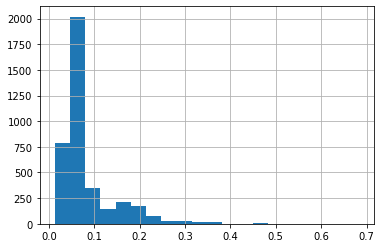

In [560]:
train['y'].hist(bins = 20)

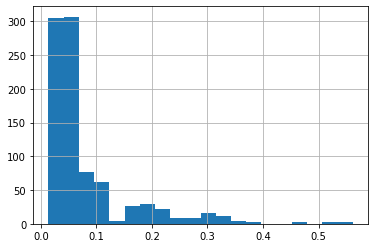

In [561]:
test['pred'].hist(bins = 20)

In [562]:
test['pred'].describe()

count    890.000000
mean       0.080950
std        0.081209
min        0.013716
25%        0.037158
50%        0.047775
75%        0.087482
max        0.561643
Name: pred, dtype: float64

In [563]:
train['y'].describe()

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64

In [564]:
test['potential'] = -np.log(test['pred']+0.01)+3
test['implementation'] = test['potential']**2/1000

In [565]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(x=test['pred'], y=test['implementation'],mode='markers'))
fig.show()

In [566]:
#test['coeff'] = test['potential']/test['implementation']

In [567]:
test

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),index,galaxy_mean_y,pred,potential,implementation
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,0.000000,0.0,0.000000,0.0,0.0,0,0.045937,0.042385,5.949139,0.035392
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,0.000000,0.0,0.000000,0.0,0.0,1,0.042850,0.038743,6.021195,0.036255
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,0.000000,0.0,0.000000,0.0,0.0,2,0.042850,0.039492,6.005936,0.036071
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,0.000000,0.0,0.000000,0.0,0.0,3,0.042614,0.038974,6.016466,0.036198
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,224.104054,0.0,7.687626,0.0,0.0,4,0.042337,0.020946,6.475496,0.041932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064,ESO 383-087 (ISG 39),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,885,0.044866,0.013716,6.741623,0.045449
886,1016064,NGC 247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,886,0.053584,0.027477,6.284016,0.039489
887,1016064,ESO 325-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,887,0.075712,0.065777,5.579958,0.031136
888,1016064,ESO 540-032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,888,0.066898,0.052077,5.779387,0.033401


In [568]:
#opt_pred = test.sort_values('implementation',ascending = False)

In [569]:
#opt_pred['opt_pred'] = [100 if i<500 else 0 for i in range(890)]

In [570]:
# test = test.merge(opt_pred[['opt_pred','index']], how = 'inner',on = 'index')
# test

In [571]:
dead_galaxy = test[test['existence expectancy index']==0]
dead_galaxy['opt_pred'] = 0
dead_galaxy

/home/aleksandr.makarychev/.conda/envs/makarychev_py_37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),index,galaxy_mean_y,pred,potential,implementation,opt_pred
885,1016064,ESO 383-087 (ISG 39),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,885,0.044866,0.013716,6.741623,0.045449,0
886,1016064,NGC 247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,886,0.053584,0.027477,6.284016,0.039489,0
887,1016064,ESO 325-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,887,0.075712,0.065777,5.579958,0.031136,0
888,1016064,ESO 540-032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,888,0.066898,0.052077,5.779387,0.033401,0
889,1016064,KK98 77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,889,0.045937,0.014868,6.694185,0.044812,0


In [572]:
norm_galaxy = test[test['existence expectancy index']!=0].sort_values('pred')

In [573]:
#test = test.sort_values('pred')
norm_galaxy['opt_pred'] = [100 if i <500 else 0 for i in range(len(norm_galaxy))]

In [574]:
galaxy = norm_galaxy.append(dead_galaxy)[['index','opt_pred']]

In [575]:
# low_galaxy = test[(test['existence expectancy index']<0.7)&(test['existence expectancy index']>0)].sort_values('pred')
# strong_galaxy = test[test['existence expectancy index']>=0.7].sort_values('pred')

In [576]:
#norm_galaxy = test[test['existence expectancy index']!=0].sort_values('pred',ascending = False)

In [577]:
# low_galaxy['opt_pred'] = [100 if i<50 else 0 for i in range(len(low_galaxy))]
# #strong_galaxy['opt_pred'] = [50+(50*(1-i/599)) if i<600 else 0 for i in range(len(strong_galaxy))]
# strong_galaxy['opt_pred'] = [100 if i<450 else 0 for i in range(len(strong_galaxy))]

In [578]:
# galaxy = low_galaxy.append(strong_galaxy)[['index','opt_pred']]
# galaxy = galaxy.append(dead_galaxy[['index','opt_pred']])

In [579]:
test = test.merge(galaxy, how = 'inner', on ='index')

In [580]:
test[test['existence expectancy index']<0.7]['opt_pred'].sum()

6400

In [581]:
test['opt_pred'].sum()

50000

In [582]:
test.to_csv('test.csv',sep ='\t', index = False)

In [583]:
#test['opt_pred'] = test['existence expectancy index'].apply(lambda x: 0 if x ==0 else 6001/66 if x<=0.7 else (49999-7001)/(890-66))

In [584]:
#(49999-5001)/(890-66)

In [585]:
result = test[['index','pred','opt_pred']]
result.sort_values('index').to_csv('res_6.csv',sep =',',index = False)